# Using Reinforcement Learning for Generator Optimization


### 1. Import the Necessary Packages

In [1]:
import sys
import gym
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=120)

### 2. Specify the Environment, and Explore the State and Action Spaces

We'll use [OpenAI Gym](https://gym.openai.com/) environments to test and develop our algorithms. These simulate a variety of classic as well as contemporary reinforcement learning tasks.  Let's use an environment that has a continuous state space, but a discrete action space.

In [2]:
# Create the PowerPlant environment
env = gym.make('gym_powerplant:powerplant_complex-v0')
#env.seed(505);

/home/tdird/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Run the next code cell to watch a random agent.

In [3]:
state = env.reset()
score = 0
for t in range(3000):
    action = env.action_space.sample()
    env.render()
    state, reward, done, _ = env.step(action)
    print(state)
    score += reward
    if done:
        break 
print('Final score:', score)
env.close()

[0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0.]
[39.256  0.     0.     0.     0.     0.     0.   ]
[77.054  0.     0.     0.     0.     0.     0.   ]
[113.439   0.      0.      0.      0.      0.      0.   ]
[148.452 483.      1.      0.      0.      1.      0.   ]
[182.135 483.      2.      0.      0.      1.      0.   ]
[214.53 483.     3.     0.     0.     1.     0.  ]
[245.674 483.      4.      0.      0.      1.      0.   ]
[275.607 483.      5.      0.      0.      1.      0.   ]
[304.365   0.      5.      0.      0.      0.      0.   ]
[331.984   0.      5.      0.      0.      0.      0.   ]
[358.5   0.    5.    0.    0.    0.    0. ]
[383.946   0.      5.      0.      0.      0.      0.   ]
[408.356   0.      5.      0.      0.      0.      0.   ]
[431.761 483.      5.      0.      1.      1.      0.   ]
[454.194 483.      5.      0.      2.      1.      0.   ]
[475.683 483.      5.      0.      3.      1.      0.   ]
[496.259 483.      5.      0.      4.      1.      0.   ]
[515.95 48

[451.667   0.    135.    132.    124.      0.      0.   ]
[454.279   0.    135.    132.    124.      0.      0.   ]
[330.951   0.    135.    132.    124.      0.      0.   ]
[333.803   0.    135.    132.    124.      0.      0.   ]
[336.506 483.    136.    132.    124.      1.      0.   ]
[345.608 483.    137.    132.    124.      1.      0.   ]
[354.327 483.    138.    132.    124.      1.      0.   ]
[362.677 483.    139.    132.    124.      1.      0.   ]
[370.667   0.    139.    132.    124.      0.      0.   ]
[378.31   0.   139.   132.   124.     0.     0.  ]
[385.617   0.    139.    132.    124.      0.      0.   ]
[392.597 483.    139.    133.    124.      1.      0.   ]
[399.262 483.    139.    134.    124.      1.      0.   ]
[405.622 483.    139.    135.    124.      1.      0.   ]
[411.686 483.    139.    136.    124.      1.      0.   ]
[417.464 966.    139.    137.    125.      2.      0.   ]
[422.965 966.    139.    138.    126.      2.      0.   ]
[428.198 483.    139.

[382.618 483.    283.    236.    267.      1.      0.   ]
[383.018 966.    284.    237.    267.      2.      0.   ]
[383.364 966.    285.    238.    267.      2.      0.   ]
[383.657 966.    286.    239.    267.      2.      0.   ]
[383.901 966.    287.    240.    267.      2.      0.   ]
[384.096 483.    287.    241.    267.      1.      0.   ]
[384.245   0.    287.    241.    267.      0.      0.   ]
[384.349   0.    287.    241.    267.      0.      0.   ]
[384.41   0.   287.   241.   267.     0.     0.  ]
[384.43   0.   287.   241.   267.     0.     0.  ]
[384.41 483.   287.   241.   268.     1.     0.  ]
[384.352 483.    287.    241.    269.      1.      0.   ]
[384.258 483.    287.    241.    270.      1.      0.   ]
[384.128 483.    287.    241.    271.      1.      0.   ]
[383.964 483.    287.    241.    272.      1.      0.   ]
[383.768   0.    287.    241.    272.      0.      0.   ]
[383.541   0.    287.    241.    272.      0.      0.   ]
[383.285   0.    287.    241.    27

In [4]:
# Explore state (observation) space
print("State space:", env.observation_space)
print("- low:", env.observation_space.low)
print("- high:", env.observation_space.high)

State space: Box(0.0, 1449.0, (7,), float32)
- low: [0. 0. 0. 0. 0. 0. 0.]
- high: [ 835. 1449.  370.  370.  370.    3.    3.]


In [5]:
# Generate some samples from the state space 
print("State space samples:")
print(np.array([env.observation_space.sample() for i in range(10)]))

State space samples:
[[1.027e+02 2.027e+02 2.749e+01 3.169e+02 6.923e+01 1.105e+00 2.391e-01]
 [5.109e+02 8.731e+02 7.543e+01 2.860e+02 3.292e+02 2.410e+00 1.071e+00]
 [3.726e+02 8.196e+02 1.074e+02 3.415e+02 3.296e+02 1.307e+00 2.286e-01]
 [4.521e+02 7.858e+02 2.991e+02 4.576e+01 1.315e+01 2.567e+00 2.988e+00]
 [1.865e+02 7.956e+02 1.625e+02 1.238e+02 2.031e+02 6.390e-01 6.392e-01]
 [4.532e+02 7.521e+02 3.437e+02 3.299e+02 1.398e+02 1.915e+00 2.896e+00]
 [6.881e+02 1.447e+03 2.065e+01 2.633e+02 1.271e+02 7.905e-01 1.256e+00]
 [4.597e+02 6.710e+02 1.005e+02 2.293e+01 2.948e+02 2.462e-01 1.764e+00]
 [2.682e+02 5.628e+02 7.915e+01 1.107e+02 3.321e+01 7.271e-01 6.306e-01]
 [4.774e+02 1.126e+03 2.857e+02 7.363e+01 5.372e+01 2.216e+00 1.135e+00]]


In [6]:
# Explore the action space
print("Action space:", env.action_space)

# Generate some samples from the action space
print("Action space samples:")
print(np.array([env.action_space.sample() for i in range(10)]))

Action space: Discrete(10)
Action space samples:
[9 5 5 0 7 1 6 7 4 5]


### 3. Discretize the State Space with a Uniform Grid

In [7]:
def create_uniform_grid(low, high, bins=(10, 10, 10, 10, 10, 3, 3)):
    """Define a uniformly-spaced grid that can be used to discretize a space.
    
    Parameters
    ----------
    low : array_like
        Lower bounds for each dimension of the continuous space.
    high : array_like
        Upper bounds for each dimension of the continuous space.
    bins : tuple
        Number of bins along each corresponding dimension.
    
    Returns
    -------
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    """
    grid = [np.linspace(low[dim], high[dim], bins[dim] + 1)[1:-1] for dim in range(len(bins))]
    print("Uniform grid: [<low>, <high>] / <bins> => <splits>")
    for l, h, b, splits in zip(low, high, bins, grid):
        print("    [{}, {}] / {} => {}".format(l, h, b, splits))
    return grid


low = [-1.0, -5.0, -5.0, -5.0, -5.0, 0, 0]
high = [1.0, 5.0, 5.0, 5.0, 5.0, 3, 3]
create_uniform_grid(low, high)  # [test]

Uniform grid: [<low>, <high>] / <bins> => <splits>
    [-1.0, 1.0] / 10 => [-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
    [0, 3] / 3 => [1. 2.]
    [0, 3] / 3 => [1. 2.]


[array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 array([1., 2.]),
 array([1., 2.])]

In [8]:
def discretize(sample, grid):
    """Discretize a sample as per given grid.
    
    Parameters
    ----------
    sample : array_like
        A single sample from the (original) continuous space.
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    
    Returns
    -------
    discretized_sample : array_like
        A sequence of integers with the same number of dimensions as sample.
    """
    return list(int(np.digitize(s, g)) for s, g in zip(sample, grid))  # apply along each dimension


# Test with a simple grid and some samples
grid = create_uniform_grid([-1.0, -5.0, -10, -10, -10, 0, 0], [1.0, 5.0, 10, 10, 10, 3, 3])
samples = np.array(
    [[-1.0 , 5.0, 10, 9.4, 9.0, 0, 1],
     [-0.81, 4.1, 4.0, 5.6, 7.5, 1, 2],
     [-0.8 , 4.0, -10, -2.0, 7.8, 1, 3],
     [-0.5 ,  0.0, -9, -4.0, 4.4, 1, 1],
     [ 0.2 , 1.9, 9, 2.3, 7.0, 1, 1],
     [ 0.8 ,  4.0, -2, 6.6, 6.9, 1, 0],
     [ 0.81,  4.1, 2.0, -1.2, 8.8, 1, 2],
     [ 1.0 ,  5.0, 10, -9, -3, 0, 3]])
discretized_samples = np.array([discretize(sample, grid) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples:", repr(discretized_samples), sep="\n")

Uniform grid: [<low>, <high>] / <bins> => <splits>
    [-1.0, 1.0] / 10 => [-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
    [-10, 10] / 10 => [-8. -6. -4. -2.  0.  2.  4.  6.  8.]
    [-10, 10] / 10 => [-8. -6. -4. -2.  0.  2.  4.  6.  8.]
    [-10, 10] / 10 => [-8. -6. -4. -2.  0.  2.  4.  6.  8.]
    [0, 3] / 3 => [1. 2.]
    [0, 3] / 3 => [1. 2.]

Samples:
array([[ -1.  ,   5.  ,  10.  ,   9.4 ,   9.  ,   0.  ,   1.  ],
       [ -0.81,   4.1 ,   4.  ,   5.6 ,   7.5 ,   1.  ,   2.  ],
       [ -0.8 ,   4.  , -10.  ,  -2.  ,   7.8 ,   1.  ,   3.  ],
       [ -0.5 ,   0.  ,  -9.  ,  -4.  ,   4.4 ,   1.  ,   1.  ],
       [  0.2 ,   1.9 ,   9.  ,   2.3 ,   7.  ,   1.  ,   1.  ],
       [  0.8 ,   4.  ,  -2.  ,   6.6 ,   6.9 ,   1.  ,   0.  ],
       [  0.81,   4.1 ,   2.  ,  -1.2 ,   8.8 ,   1.  ,   2.  ],
       [  1.  ,   5.  ,  10.  ,  -9.  ,  -3.  ,   0.  ,   3.  ]])

Discretized samples:
array([[0, 9, 9, 9, 9, 0, 1],
 

In [9]:
# Create a grid to discretize the state space
state_grid = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(10, 3, 10, 10, 10, 3, 3))
state_grid

Uniform grid: [<low>, <high>] / <bins> => <splits>
    [0.0, 835.0] / 10 => [ 83.5 167.  250.5 334.  417.5 501.  584.5 668.  751.5]
    [0.0, 1449.0] / 3 => [483. 966.]
    [0.0, 370.0] / 10 => [ 37.  74. 111. 148. 185. 222. 259. 296. 333.]
    [0.0, 370.0] / 10 => [ 37.  74. 111. 148. 185. 222. 259. 296. 333.]
    [0.0, 370.0] / 10 => [ 37.  74. 111. 148. 185. 222. 259. 296. 333.]
    [0.0, 3.0] / 3 => [1. 2.]
    [0.0, 3.0] / 3 => [1. 2.]


[array([ 83.5, 167. , 250.5, 334. , 417.5, 501. , 584.5, 668. , 751.5]),
 array([483., 966.]),
 array([ 37.,  74., 111., 148., 185., 222., 259., 296., 333.]),
 array([ 37.,  74., 111., 148., 185., 222., 259., 296., 333.]),
 array([ 37.,  74., 111., 148., 185., 222., 259., 296., 333.]),
 array([1., 2.]),
 array([1., 2.])]

### 5. Q-Learning

Provided below is a simple Q-Learning agent.

In [10]:
class QLearningAgent:
    """Q-Learning agent that can act on a continuous state space by discretizing it."""

    def __init__(self, env, state_grid, alpha=0.02, gamma=0.97,
                 epsilon=1.0, epsilon_decay_rate=0.9995, min_epsilon=.01, seed=505):
        """Initialize variables, create grid for discretization."""
        # Environment info
        self.env = env
        self.state_grid = state_grid
        self.state_size = tuple(len(splits) + 1 for splits in self.state_grid)  # n-dimensional state space
        self.action_size = self.env.action_space.n  # 1-dimensional discrete action space
        self.seed = np.random.seed(seed)
        print("Environment:", self.env)
        print("State space size:", self.state_size)
        print("Action space size:", self.action_size)
        
        # Learning parameters
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = self.initial_epsilon = epsilon  # initial exploration rate
        self.epsilon_decay_rate = epsilon_decay_rate # how quickly should we decrease epsilon
        self.min_epsilon = min_epsilon
        
        # Create Q-table
        self.q_table = np.zeros(shape=(self.state_size + (self.action_size,)))
        print("Q table size:", self.q_table.shape)

    def preprocess_state(self, state):
        """Map a continuous state to its discretized representation."""
        return tuple(discretize(state, self.state_grid))

    def reset_episode(self, state):
        """Reset variables for a new episode."""
        # Gradually decrease exploration rate
        self.epsilon *= self.epsilon_decay_rate
        self.epsilon = max(self.epsilon, self.min_epsilon)

        # Decide initial action
        self.last_state = self.preprocess_state(state)
        self.last_action = np.argmax(self.q_table[self.last_state])
        return self.last_action
    
    def reset_exploration(self, epsilon=None):
        """Reset exploration rate used when training."""
        self.epsilon = epsilon if epsilon is not None else self.initial_epsilon

    def act(self, state, reward=None, done=None, mode='train'):
        """Pick next action and update internal Q table (when mode != 'test')."""
        state = self.preprocess_state(state)
        if mode == 'test':
            # Test mode: Simply produce an action
            action = np.argmax(self.q_table[state])
        else:
            # Train mode (default): Update Q table, pick next action
            # Note: We update the Q table entry for the *last* (state, action) pair with current state, reward
            self.q_table[self.last_state + (self.last_action,)] += self.alpha * \
                (reward + self.gamma * max(self.q_table[state]) - self.q_table[self.last_state + (self.last_action,)])

            # Exploration vs. exploitation
            do_exploration = np.random.uniform(0, 1) < self.epsilon
            if do_exploration:
                # Pick a random action
                action = np.random.randint(0, self.action_size)
            else:
                # Pick the best action from Q table
                action = np.argmax(self.q_table[state])

        # Roll over current state, action for next step
        self.last_state = state
        self.last_action = action
        return action

    
q_agent = QLearningAgent(env, state_grid)

Environment: <PowerPlantComplexEnv<powerplant_complex-v0>>
State space size: (10, 3, 10, 10, 10, 3, 3)
Action space size: 10
Q table size: (10, 3, 10, 10, 10, 3, 3, 10)


In [12]:
def run(agent, env, num_episodes=10000, mode='train'):
    """Run agent in given reinforcement learning environment and return scores."""
    scores = []
    max_avg_score = -np.inf
    for i_episode in range(1, num_episodes+1):
        # Initialize episode
        state = env.reset()
        action = agent.reset_episode(state)
        total_reward = 0
        done = False

        # Roll out steps until done
        while not done:
            state, reward, done, info = env.step(action)
            total_reward += reward
            action = agent.act(state, reward, done, mode)

        # Save final score
        scores.append(total_reward)
        
        # Print episode stats
        if mode == 'train':
            if len(scores) > 100:
                avg_score = np.mean(scores[-100:])
                if avg_score > max_avg_score:
                    max_avg_score = avg_score
            if i_episode % 100 == 0:
                print("\rEpisode {}/{} | Max Average Score: {}".format(i_episode, num_episodes, max_avg_score), end="")
                #print(state)
                sys.stdout.flush()

    return scores

scores = run(q_agent, env)

Episode 10000/10000 | Max Average Score: 3051.08

Text(0, 0.5, 'Rewards')

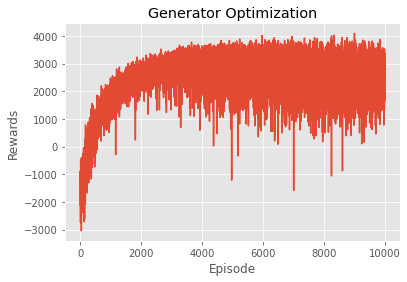

In [13]:
# Plot scores obtained per episode
plt.plot(scores); plt.title("Generator Optimization"); plt.xlabel("Episode"); plt.ylabel("Rewards")

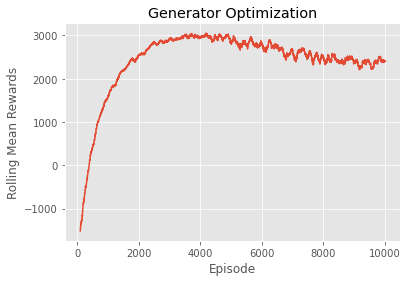

In [14]:
def plot_scores(scores, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    #plt.plot(scores); plt.title("Scores");
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean); plt.title("Generator Optimization"); plt.xlabel("Episode"); plt.ylabel("Rolling Mean Rewards")
    return rolling_mean

rolling_mean = plot_scores(scores)

### 7. Watch a Q-Learning Agent

In [15]:
import pandas as pd
df = pd.DataFrame(columns=['Target Current Load', 
                           'Available Current Capacity', 
                           'Generator 1 Runtime', 
                           'Generator 2 Runtime', 
                           'Generator 3 Runtime',
                           'Running Generator Count',
                           'Failed Generator Count'])

state = env.reset()
score = 0
action_list = []
for t in range(365*3):
    action = q_agent.act(state, mode='test')
    action_list.append(action)
    #env.render()
    state, reward, done, _ = env.step(action)
    score += reward
    print(state)
    df = df.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)
    if done:
        break 
print('Final Reward:', score)
env.close()

[  0 483   1   0   0   1   0]
[  0. 483.   2.   0.   0.   1.   0.]
[ 39.256 483.      3.      0.      0.      1.      0.   ]
[ 77.054 483.      4.      0.      0.      1.      0.   ]
[113.439 483.      5.      0.      0.      1.      0.   ]
[148.452 483.      6.      0.      0.      1.      0.   ]
[182.135 483.      7.      0.      0.      1.      0.   ]
[214.53 483.     8.     0.     0.     1.     0.  ]
[245.674 483.      9.      0.      0.      1.      0.   ]
[275.607 483.     10.      0.      0.      1.      0.   ]
[304.365 483.     11.      0.      0.      1.      0.   ]
[331.984 483.     12.      0.      0.      1.      0.   ]
[358.5 483.   13.    0.    0.    1.    0. ]
[383.946 966.     14.      1.      0.      2.      0.   ]
[408.356 483.     15.      1.      0.      1.      0.   ]
[431.761 966.     16.      2.      0.      2.      0.   ]
[454.194 966.     17.      3.      0.      2.      0.   ]
[475.683 966.     18.      4.      0.      2.      0.   ]
[496.259 966.     19.     

[527.835 966.    188.    151.     34.      2.      0.   ]
[530.315 966.    189.    152.     34.      2.      0.   ]
[532.609 966.    190.    153.     34.      2.      0.   ]
[534.721 966.    191.    154.     34.      2.      0.   ]
[536.66 966.   192.   155.    34.     2.     0.  ]
[538.431 966.    193.    156.     34.      2.      0.   ]
[540.039 966.    194.    157.     34.      2.      0.   ]
[541.492 966.    195.    158.     34.      2.      0.   ]
[542.793 966.    196.    159.     34.      2.      0.   ]
[543.95 966.   197.   160.    34.     2.     0.  ]
[544.967 966.    198.    161.     34.      2.      0.   ]
[545.849 966.    199.    162.     34.      2.      0.   ]
[546.601 966.    200.    163.     34.      2.      0.   ]
[547.228 966.    201.    164.     34.      2.      0.   ]
[547.735 966.    202.    165.     34.      2.      0.   ]
[548.126 966.    203.    166.     34.      2.      0.   ]
[548.406 966.    204.    167.     34.      2.      0.   ]
[548.579 966.    205.    168

[466.492 966.    356.    340.     55.      2.      0.   ]
[464.663 966.    356.    341.     56.      2.      0.   ]
[462.839 966.    356.    342.     57.      2.      0.   ]
[461.02 966.   356.   343.    58.     2.     0.  ]
[459.207 966.    356.    344.     59.      2.      0.   ]
[457.399 966.    356.    345.     60.      2.      0.   ]
[455.599 966.    356.    346.     61.      2.      0.   ]
[453.805 966.    356.    347.     62.      2.      0.   ]
[452.018 966.    356.    348.     63.      2.      0.   ]
[450.239 966.    356.    349.     64.      2.      0.   ]
[448.468 966.    356.    350.     65.      2.      0.   ]
[446.705 966.    356.    351.     66.      2.      0.   ]
[444.95 966.   356.   352.    67.     2.     0.  ]
[443.205 966.    356.    353.     68.      2.      0.   ]
[441.468 966.    356.    354.     69.      2.      0.   ]
[439.741 966.    356.    355.     70.      2.      0.   ]
[438.023 966.    356.    356.     71.      2.      0.   ]
[436.315 966.    356.    357

[412.603 483.    356.    358.    249.      1.      1.   ]
[286.305 483.    356.    358.    250.      1.      1.   ]
[292.125 483.    356.    358.    251.      1.      1.   ]
[297.693 483.    356.    358.    252.      1.      1.   ]
[309.561 483.    356.    358.    253.      1.      1.   ]
[320.951 483.    356.    358.    254.      1.      1.   ]
[331.878 483.    356.    358.    255.      1.      1.   ]
[342.355 483.    356.    358.    256.      1.      1.   ]
[352.398 483.    356.    358.    257.      1.      1.   ]
[362.019 483.    356.    358.    258.      1.      1.   ]
[371.231 483.    356.    358.    259.      1.      1.   ]
[380.048 483.    356.    358.    260.      1.      1.   ]
[388.482 483.    356.    358.    261.      1.      1.   ]
[396.545 483.    356.    358.    262.      1.      1.   ]
[404.249 483.    356.    358.    263.      1.      1.   ]
[411.604 483.    356.    358.    264.      1.      1.   ]
[418.623 483.    356.    358.    265.      1.      1.   ]
[425.316 483. 

In [16]:
df.head()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
0,0,483,1,0,0,1,0
1,0,483,2,0,0,1,0
2,39.2561,483,3,0,0,1,0
3,77.0543,483,4,0,0,1,0
4,113.439,483,5,0,0,1,0


In [17]:
df.describe()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
count,669.0,669.0,669.0,669.0,669.0,669.0,669.0
unique,668.0,4.0,356.0,359.0,341.0,4.0,3.0
top,0.0,966.0,356.0,358.0,34.0,2.0,0.0
freq,2.0,373.0,308.0,269.0,283.0,373.0,401.0


In [18]:
for i in range(1,50):
        df = df.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)

Text(0, 0.5, 'Current (A)')

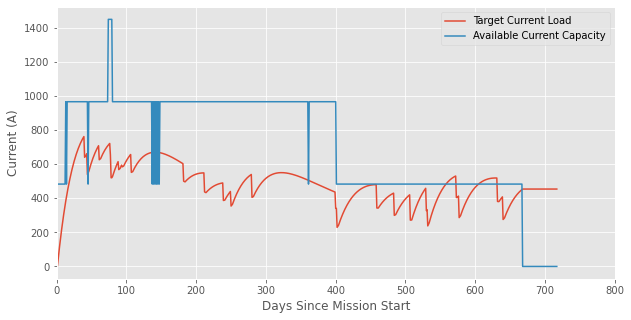

In [19]:
ax = plt.gca()

#df.plot(kind='line', y='Target Current Load', ax=ax, xlim = (0,1200))
#df.plot(kind='line', y='Available Current Capacity', ax=ax, xlim = (0,1200))

df.plot(kind='line', y='Target Current Load', ax=ax, xlim = (0,800), figsize=(10,5))
df.plot(kind='line', y='Available Current Capacity', ax=ax, xlim = (0,800), figsize=(10,5))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Current (A)')

Text(0, 0.5, 'Generator Runtime (Days)')

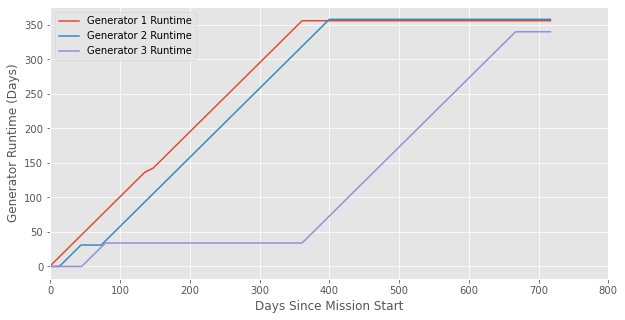

In [20]:
ax2 = plt.gca()
ax2.ylabel = "Runtime"
df.plot(kind='line', y='Generator 1 Runtime', ax=ax2, xlim = (0,800), figsize=(10,5))
df.plot(kind='line', y='Generator 2 Runtime', ax=ax2, xlim = (0,800), figsize=(10,5))
df.plot(kind='line', y='Generator 3 Runtime', ax=ax2, xlim = (0,800), figsize=(10,5))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Generator Runtime (Days)')

In [21]:
print(action_list)

[0, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 3, 5, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 9, 9, 9, 9, 4, 6, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 8, 8, 8, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Random Generators On

In [22]:
state = env.reset()
score = 0

df_random = pd.DataFrame(columns=['Target Current Load', 
                           'Available Current Capacity', 
                           'Generator 1 Runtime', 
                           'Generator 2 Runtime', 
                           'Generator 3 Runtime',
                           'Running Generator Count',
                           'Failed Generator Count'])

for t in range(375*3):
    action = env.action_space.sample()
    env.render()
    state, reward, done, _ = env.step(action)
    print(state)
        
    df_random = df_random.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)
    
    score += reward
    if done:
        break 
print('Final score:', score)
env.close()

[0 0 0 0 0 0 0]
[  0. 483.   1.   0.   0.   1.   0.]
[ 39.256 483.      2.      0.      0.      1.      0.   ]
[ 77.054 483.      3.      0.      0.      1.      0.   ]
[113.439 483.      4.      0.      0.      1.      0.   ]
[148.452 966.      5.      1.      0.      2.      0.   ]
[182.135 966.      6.      2.      0.      2.      0.   ]
[214.53 966.     7.     3.     0.     2.     0.  ]
[245.674 483.      8.      3.      0.      1.      0.   ]
[275.607 483.      9.      3.      0.      1.      0.   ]
[304.365   0.      9.      3.      0.      0.      0.   ]
[331.984   0.      9.      3.      0.      0.      0.   ]
[358.5 483.    9.    4.    0.    1.    0. ]
[383.946 483.      9.      5.      0.      1.      0.   ]
[408.356 483.      9.      6.      0.      1.      0.   ]
[431.761 483.      9.      7.      0.      1.      0.   ]
[454.194 483.      9.      8.      0.      1.      0.   ]
[475.683 966.     10.      9.      0.      2.      0.   ]
[496.259 483.     11.      9.      0.   

[418.525 483.     61.     63.     44.      1.      0.   ]
[426.646   0.     61.     63.     44.      0.      0.   ]
[434.395   0.     61.     63.     44.      0.      0.   ]
[441.784   0.     61.     63.     44.      0.      0.   ]
[448.824 483.     62.     63.     44.      1.      0.   ]
[455.527 483.     63.     63.     44.      1.      0.   ]
[461.904 966.     64.     64.     44.      2.      0.   ]
[467.964 483.     65.     64.     44.      1.      0.   ]
[473.719 483.     66.     64.     44.      1.      0.   ]
[479.178 483.     67.     64.     44.      1.      0.   ]
[484.351 483.     68.     64.     44.      1.      0.   ]
[489.247 483.     69.     64.     44.      1.      0.   ]
[493.876 966.     70.     65.     44.      2.      0.   ]
[498.247 966.     71.     66.     44.      2.      0.   ]
[502.367 966.     72.     67.     44.      2.      0.   ]
[506.246 966.     73.     68.     44.      2.      0.   ]
[509.891 966.     74.     69.     44.      2.      0.   ]
[513.311 483. 

[343.149 483.    149.    157.     93.      1.      0.   ]
[347.416 483.    149.    158.     93.      1.      0.   ]
[351.489 483.    149.    159.     93.      1.      0.   ]
[355.375 483.    149.    160.     93.      1.      0.   ]
[359.079   0.    149.    160.     93.      0.      0.   ]
[362.609 483.    149.    161.     93.      1.      0.   ]
[365.969 966.    150.    162.     93.      2.      0.   ]
[369.164 483.    150.    163.     93.      1.      0.   ]
[372.201 483.    150.    164.     93.      1.      0.   ]
[375.083   0.    150.    164.     93.      0.      0.   ]
[377.817 483.    150.    165.     93.      1.      0.   ]
[296.108 483.    150.    166.     93.      1.      0.   ]
[299.005 483.    150.    167.     93.      1.      0.   ]
[301.763 483.    150.    168.     93.      1.      0.   ]
[310.929 966.    151.    169.     93.      2.      0.   ]
[319.723 966.    152.    170.     93.      2.      0.   ]
[328.156 483.    152.    171.     93.      1.      0.   ]
[336.238 483. 

[428.669 483.    213.    225.    166.      1.      0.   ]
[430.349 966.    213.    226.    167.      2.      0.   ]
[431.907 966.    213.    227.    168.      2.      0.   ]
[ 433.349 1449.     214.     228.     169.       3.       0.   ]
[434.679 966.    214.    229.    170.      2.      0.   ]
[435.9 483.  214.  229.  171.    1.    0. ]
[437.016 483.    214.    229.    172.      1.      0.   ]
[438.031   0.    214.    229.    172.      0.      0.   ]
[438.949   0.    214.    229.    172.      0.      0.   ]
[439.773   0.    214.    229.    172.      0.      0.   ]
[440.506   0.    214.    229.    172.      0.      0.   ]
[441.152   0.    214.    229.    172.      0.      0.   ]
[335.805   0.    214.    229.    172.      0.      0.   ]
[336.88   0.   214.   229.   172.     0.     0.  ]
[337.875   0.    214.    229.    172.      0.      0.   ]
[345.335   0.    214.    229.    172.      0.      0.   ]
[352.478 483.    214.    230.    172.      1.      0.   ]
[359.312 483.    214.    231

[420.486 483.    271.    318.    223.      1.      0.   ]
[424.122 966.    272.    318.    224.      2.      0.   ]
[427.564 483.    273.    318.    224.      1.      0.   ]
[430.816 483.    274.    318.    224.      1.      0.   ]
[433.886 483.    275.    318.    224.      1.      0.   ]
[436.779 483.    276.    318.    224.      1.      0.   ]
[439.502 483.    277.    318.    224.      1.      0.   ]
[442.059 483.    278.    318.    224.      1.      0.   ]
[444.458 483.    279.    318.    224.      1.      0.   ]
[446.702 483.    280.    318.    224.      1.      0.   ]
[448.798 966.    281.    319.    224.      2.      0.   ]
[450.751 966.    282.    320.    224.      2.      0.   ]
[452.564 966.    283.    321.    224.      2.      0.   ]
[454.244 966.    284.    322.    224.      2.      0.   ]
[455.795 966.    285.    323.    224.      2.      0.   ]
[457.221 483.    286.    323.    224.      1.      0.   ]
[458.527 483.    287.    323.    224.      1.      0.   ]
[459.717 966. 

[410.764 966.    361.    395.    317.      2.      0.   ]
[411.629 966.    362.    395.    318.      2.      0.   ]
[412.41 966.   363.   395.   319.     2.     0.  ]
[413.113 966.    364.    395.    320.      2.      0.   ]
[413.739 966.    365.    395.    321.      2.      0.   ]
[ 414.292 1449.     366.     396.     322.       3.       0.   ]
[ 414.773 1449.     367.     397.     323.       3.       0.   ]
[415.186 966.    367.    398.    324.      2.      0.   ]
[415.533 966.    367.    399.    325.      2.      0.   ]
[ 415.817 1449.     368.     400.     326.       3.       0.   ]
[416.04 966.   369.   401.   326.     2.     0.  ]
[416.204 966.    370.    402.    326.      2.      0.   ]
[416.312 966.    371.    403.    326.      2.      0.   ]
[416.365 483.    371.    404.    326.      1.      0.   ]
[416.366 483.    371.    405.    326.      1.      0.   ]
[416.317 966.    371.    406.    327.      2.      0.   ]
[ 416.22 1449.    372.    407.    328.      3.      0.  ]
[ 416.0

In [23]:
df.head()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
0,0,483,1,0,0,1,0
1,0,483,2,0,0,1,0
2,39.2561,483,3,0,0,1,0
3,77.0543,483,4,0,0,1,0
4,113.439,483,5,0,0,1,0


In [24]:
df.describe()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
count,718.00000,718.0,718.0,718.0,718.0,718.0,718.0
unique,668.00000,4.0,356.0,359.0,341.0,4.0,3.0
top,453.86768,966.0,356.0,358.0,34.0,2.0,0.0
freq,50.00000,373.0,357.0,318.0,283.0,373.0,401.0


In [25]:
for i in range(1,50):
        df_random = df_random.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)

Text(0, 0.5, 'Current (A)')

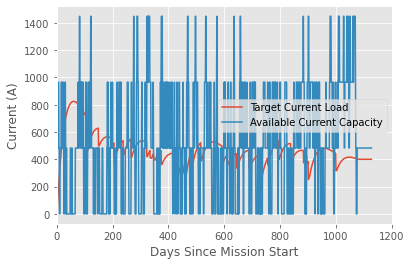

In [26]:
ax_random = plt.gca()
ax_random.ylabel = "Current"
df_random.plot(kind='line', y='Target Current Load', ax=ax_random, xlim = (0,1200))
df_random.plot(kind='line', y='Available Current Capacity', ax=ax_random, xlim = (0,1200))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Current (A)')

Text(0, 0.5, 'Generator Runtime (Days)')

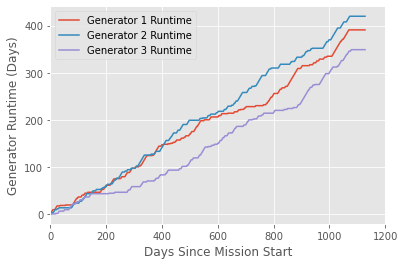

In [27]:
ax2_random = plt.gca()
ax2_random.ylabel = "Runtime"
df_random.plot(kind='line', y='Generator 1 Runtime', ax=ax2_random, xlim = (0,1200))
df_random.plot(kind='line', y='Generator 2 Runtime', ax=ax2_random, xlim = (0,1200))
df_random.plot(kind='line', y='Generator 3 Runtime', ax=ax2_random, xlim = (0,1200))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Generator Runtime (Days)')

# All Generators On

In [28]:
import random
df_baseline = pd.DataFrame(columns=['Target Current Load', 
                           'Available Current Capacity', 
                           'Generator 1 Runtime', 
                           'Generator 2 Runtime', 
                           'Generator 3 Runtime',
                           'Running Generator Count',
                           'Failed Generator Count'])

state = env.reset()
score = 0
choices = [0, 3, 6]
for t in range(365*3):
    action = random.choice(choices)
    env.render()
    state, reward, done, _ = env.step(action)
    print(state)
        
    df_baseline = df_baseline.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)
    
    score += reward
    if done:
        break 
print('Final score:', score)
env.close()

[  0 483   0   0   1   1   0]
[  0. 966.   1.   0.   2.   2.   0.]
[ 39.256 966.      2.      0.      3.      2.      0.   ]
[7.705e+01 1.449e+03 3.000e+00 1.000e+00 4.000e+00 3.000e+00 0.000e+00]
[ 113.439 1449.       4.       2.       5.       3.       0.   ]
[ 148.452 1449.       5.       3.       6.       3.       0.   ]
[ 182.135 1449.       6.       4.       7.       3.       0.   ]
[ 214.53 1449.      7.      5.      8.      3.      0.  ]
[ 245.674 1449.       8.       6.       9.       3.       0.   ]
[ 275.607 1449.       9.       7.      10.       3.       0.   ]
[ 304.365 1449.      10.       8.      11.       3.       0.   ]
[ 331.984 1449.      11.       9.      12.       3.       0.   ]
[ 358.5 1449.    12.    10.    13.     3.     0. ]
[ 383.946 1449.      13.      11.      14.       3.       0.   ]
[ 408.356 1449.      14.      12.      15.       3.       0.   ]
[ 431.761 1449.      15.      13.      16.       3.       0.   ]
[ 454.194 1449.      16.      14.      17.  

[ 412.56 1449.    207.    205.    208.      3.      0.  ]
[ 410.946 1449.     208.     206.     209.       3.       0.   ]
[ 409.331 1449.     209.     207.     210.       3.       0.   ]
[ 414.258 1449.     210.     208.     211.       3.       0.   ]
[ 418.943 1449.     211.     209.     212.       3.       0.   ]
[ 423.394 1449.     212.     210.     213.       3.       0.   ]
[ 427.617 1449.     213.     211.     214.       3.       0.   ]
[ 431.621 1449.     214.     212.     215.       3.       0.   ]
[ 367.884 1449.     215.     213.     216.       3.       0.   ]
[ 371.743 1449.     216.     214.     217.       3.       0.   ]
[ 375.4 1449.   217.   215.   218.     3.     0. ]
[ 385.405 1449.     218.     216.     219.       3.       0.   ]
[ 394.978 1449.     219.     217.     220.       3.       0.   ]
[ 404.133 1449.     220.     218.     221.       3.       0.   ]
[ 412.883 1449.     221.     219.     222.       3.       0.   ]
[ 421.242 1449.     222.     220.     223.    

In [29]:
df.head()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
0,0,483,1,0,0,1,0
1,0,483,2,0,0,1,0
2,39.2561,483,3,0,0,1,0
3,77.0543,483,4,0,0,1,0
4,113.439,483,5,0,0,1,0


In [30]:
df.describe()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
count,718.00000,718.0,718.0,718.0,718.0,718.0,718.0
unique,668.00000,4.0,356.0,359.0,341.0,4.0,3.0
top,453.86768,966.0,356.0,358.0,34.0,2.0,0.0
freq,50.00000,373.0,357.0,318.0,283.0,373.0,401.0


In [31]:
for i in range(1,100):
        df_baseline = df_baseline.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)

Text(0, 0.5, 'Current (A)')

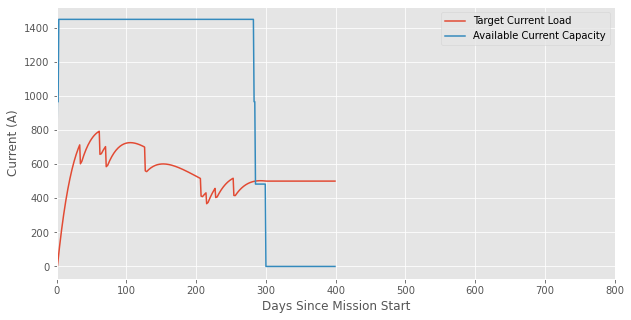

In [32]:
ax_baseline = plt.gca()
ax_baseline.ylabel = "Current"
df_baseline.plot(kind='line', y='Target Current Load', ax=ax_baseline, xlim = (0,800), figsize =(10,5) )
df_baseline.plot(kind='line', y='Available Current Capacity', ax=ax_baseline, xlim = (0,800), figsize = (10,5))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Current (A)')

Text(0, 0.5, 'Generator Runtime (Days)')

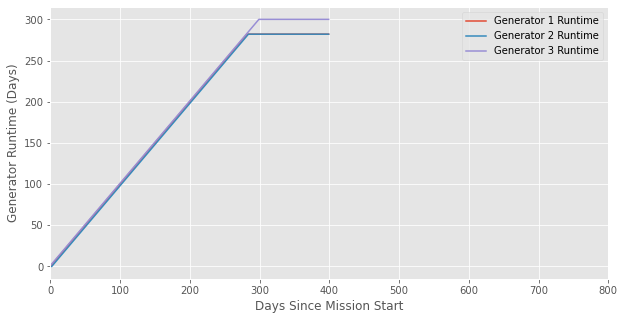

In [33]:
ax2_baseline = plt.gca()
ax2_baseline.ylabel = "Runtime"
df_baseline.plot(kind='line', y='Generator 1 Runtime', ax=ax2_baseline, xlim = (0,800), figsize=(10,5))
df_baseline.plot(kind='line', y='Generator 2 Runtime', ax=ax2_baseline, xlim = (0,800), figsize=(10,5))
df_baseline.plot(kind='line', y='Generator 3 Runtime', ax=ax2_baseline, xlim = (0,800), figsize=(10,5))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Generator Runtime (Days)')

# Thresholding Agent

In [34]:
import random

df_thresholding = pd.DataFrame(columns=['Target Current Load', 
                           'Available Current Capacity', 
                           'Generator 1 Runtime', 
                           'Generator 2 Runtime', 
                           'Generator 3 Runtime',
                           'Running Generator Count',
                           'Failed Generator Count'])

state = env.reset()
score = 0

df_thresholding = df_thresholding.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)


for t in range(365*3):
    
    # If Target Current Load is 90% of Max Current Capacity, turn on generator with least runtime
    if state[0] >= 0.90*state[1]:
        if state[2] <= state[3] and state[2] <= state[4]:
            action = 0
        elif state[3] <= state[2] and state[3] <= state[4]:
            action = 3
        elif state[4] <= state[2] and state[4] <= state[3]:
            action = 6
        else:
            action = 9
    # If no Generators are on, turn on a generator
    elif state[5] == 0:
        if state[2] <= state[3] and state[2] <= state[4]:
            action = 0
        elif state[3] <= state[2] and state[3] <= state[4]:
            action = 3
        elif state[4] <= state[2] and state[4] <= state[3]:
            action = 6
        else:
            action = random.choice([0, 3, 6])
    # If Target Current Load is less than 25% of Max Current Capacity, turn off generator with most runtime
    elif state[0] < 0.25*state[1] and state[5] > 1:
        if state[2] >= state[3] and state[2] >= state[4]:
            action = 1
        elif state[3] >= state[2] and state[3] >= state[4]:
            action = 4
        elif state[4] >= state[2] and state[4] >= state[3]:
            action = 7
        else:
            action = 9
        
    else:
        action = 9
            
        
    env.render()
    state, reward, done, _ = env.step(action)
    print(state)
        
    df_thresholding = df_thresholding.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)
    
    score += reward
    if done:
        break 
print('Final score:', score)
env.close()

[  0 483   1   0   0   1   0]
[  0. 483.   2.   0.   0.   1.   0.]
[ 39.256 483.      3.      0.      0.      1.      0.   ]
[ 77.054 483.      4.      0.      0.      1.      0.   ]
[113.439 483.      5.      0.      0.      1.      0.   ]
[123.71 483.     6.     0.     0.     1.     0.  ]
[151.779 483.      7.      0.      0.      1.      0.   ]
[178.775 483.      8.      0.      0.      1.      0.   ]
[211.271 483.      9.      0.      0.      1.      0.   ]
[242.515 483.     10.      0.      0.      1.      0.   ]
[272.544 483.     11.      0.      0.      1.      0.   ]
[301.396 483.     12.      0.      0.      1.      0.   ]
[329.106 483.     13.      0.      0.      1.      0.   ]
[355.71 483.    14.     0.     0.     1.     0.  ]
[381.242 483.     15.      0.      0.      1.      0.   ]
[405.736 483.     16.      0.      0.      1.      0.   ]
[429.222 483.     17.      0.      0.      1.      0.   ]
[451.733 483.     18.      0.      0.      1.      0.   ]
[473.299 966.     1

[461.462 966.    211.    193.      0.      2.      0.   ]
[466.856 966.    212.    194.      0.      2.      0.   ]
[471.971 966.    213.    195.      0.      2.      0.   ]
[476.816 966.    214.    196.      0.      2.      0.   ]
[481.4 966.  215.  197.    0.    2.    0. ]
[485.732 966.    216.    198.      0.      2.      0.   ]
[489.819 966.    217.    199.      0.      2.      0.   ]
[493.67 966.   218.   200.     0.     2.     0.  ]
[497.294 966.    219.    201.      0.      2.      0.   ]
[500.697 966.    220.    202.      0.      2.      0.   ]
[503.887 966.    221.    203.      0.      2.      0.   ]
[506.872 966.    222.    204.      0.      2.      0.   ]
[509.657 966.    223.    205.      0.      2.      0.   ]
[512.252 966.    224.    206.      0.      2.      0.   ]
[514.66 966.   225.   207.     0.     2.     0.  ]
[516.89 966.   226.   208.     0.     2.     0.  ]
[518.948 966.    227.    209.      0.      2.      0.   ]
[520.839 966.    228.    210.      0.      2.    

[414.621 483.    282.    324.    136.      1.      2.   ]
[416.137 483.    282.    324.    137.      1.      2.   ]
[417.545 483.    282.    324.    138.      1.      2.   ]
[418.847 483.    282.    324.    139.      1.      2.   ]
[420.046 483.    282.    324.    140.      1.      2.   ]
[421.148 483.    282.    324.    141.      1.      2.   ]
[422.154 483.    282.    324.    142.      1.      2.   ]
[423.069 483.    282.    324.    143.      1.      2.   ]
[423.896 483.    282.    324.    144.      1.      2.   ]
[424.637 483.    282.    324.    145.      1.      2.   ]
[425.297 483.    282.    324.    146.      1.      2.   ]
[425.878 483.    282.    324.    147.      1.      2.   ]
[426.382 483.    282.    324.    148.      1.      2.   ]
[426.813 483.    282.    324.    149.      1.      2.   ]
[427.173 483.    282.    324.    150.      1.      2.   ]
[427.466 483.    282.    324.    151.      1.      2.   ]
[427.693 483.    282.    324.    152.      1.      2.   ]
[427.857 483. 

[364.948 483.    282.    324.    322.      1.      2.   ]
[363.755 483.    282.    324.    323.      1.      2.   ]
[362.561 483.    282.    324.    324.      1.      2.   ]
[367.91 483.   282.   324.   325.     1.     2.  ]
[373.015 483.    282.    324.    326.      1.      2.   ]
[377.885 483.    282.    324.    327.      1.      2.   ]
[382.528 483.    282.    324.    328.      1.      2.   ]
[386.95 483.   282.   324.   329.     1.     2.  ]
[391.16 483.   282.   324.   330.     1.     2.  ]
[395.163 483.    282.    324.    331.      1.      2.   ]
[398.966 483.    282.    324.    332.      1.      2.   ]
[402.576 483.    282.    324.    333.      1.      2.   ]
[405.999 483.    282.    324.    334.      1.      2.   ]
[409.242 483.    282.    324.    335.      1.      2.   ]
[412.31 483.   282.   324.   336.     1.     2.  ]
[415.209 483.    282.    324.    337.      1.      2.   ]
[417.944 483.    282.    324.    338.      1.      2.   ]
[420.522 483.    282.    324.    339.     

In [35]:
df.head()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
0,0,483,1,0,0,1,0
1,0,483,2,0,0,1,0
2,39.2561,483,3,0,0,1,0
3,77.0543,483,4,0,0,1,0
4,113.439,483,5,0,0,1,0


In [36]:
df.describe()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
count,718.00000,718.0,718.0,718.0,718.0,718.0,718.0
unique,668.00000,4.0,356.0,359.0,341.0,4.0,3.0
top,453.86768,966.0,356.0,358.0,34.0,2.0,0.0
freq,50.00000,373.0,357.0,318.0,283.0,373.0,401.0


In [37]:
for i in range(1,500):
        df_thresholding = df_thresholding.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)

Text(0, 0.5, 'Current (A)')

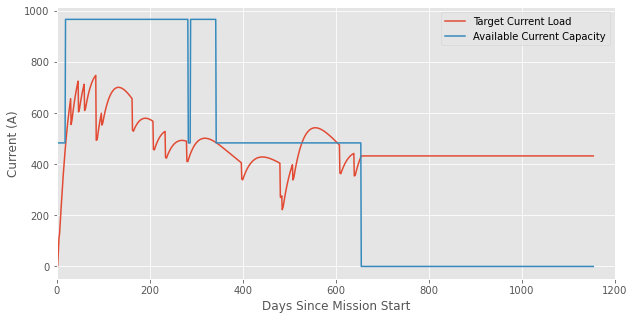

In [38]:
ax_thresholding = plt.gca()
ax_thresholding.ylabel = "Current"
df_thresholding.plot(kind='line', y='Target Current Load', ax=ax_thresholding, xlim = (0,1200), figsize =(10,5))
df_thresholding.plot(kind='line', y='Available Current Capacity', ax=ax_thresholding, xlim = (0,1200), figsize =(10,5))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Current (A)')

Text(0, 0.5, 'Generator Runtime (Days)')

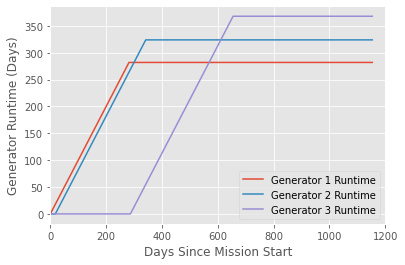

In [39]:
ax2_thresholding = plt.gca()
ax2_thresholding.ylabel = "Runtime"
df_thresholding.plot(kind='line', y='Generator 1 Runtime', ax=ax2_thresholding, xlim = (0,1200))
df_thresholding.plot(kind='line', y='Generator 2 Runtime', ax=ax2_thresholding, xlim = (0,1200))
df_thresholding.plot(kind='line', y='Generator 3 Runtime', ax=ax2_thresholding, xlim = (0,1200))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Generator Runtime (Days)')

# Thresholding Agent with Maintenance

In [40]:
import random

df_thresholding = pd.DataFrame(columns=['Target Current Load', 
                           'Available Current Capacity', 
                           'Generator 1 Runtime', 
                           'Generator 2 Runtime', 
                           'Generator 3 Runtime',
                           'Running Generator Count',
                           'Failed Generator Count'])

state = env.reset()
score = 0

df_thresholding = df_thresholding.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)


for t in range(365*3):
    
    # If Target Current Load is 90% of Max Current Capacity, turn on generator with least runtime
    if state[0] >= 0.90*state[1]:
        if state[2] <= state[3] and state[2] <= state[4]:
            action = 0
        elif state[3] <= state[2] and state[3] <= state[4]:
            action = 3
        elif state[4] <= state[2] and state[4] <= state[3]:
            action = 6
        else:
            action = 9
    # If no Generators are on, turn on a generator
    elif state[5] == 0:
        if state[2] <= state[3] and state[2] <= state[4]:
            action = 0
        elif state[3] <= state[2] and state[3] <= state[4]:
            action = 3
        elif state[4] <= state[2] and state[4] <= state[3]:
            action = 6
        else:
            action = random.choice([0, 3, 6])
    # If Target Current Load is less than 25% of Max Current Capacity, turn off generator with most runtime
    elif state[0] < 0.25*state[1] and state[5] > 1:
        if state[2] >= state[3] and state[2] >= state[4]:
            action = 2
        elif state[3] >= state[2] and state[3] >= state[4]:
            action = 5
        elif state[4] >= state[2] and state[4] >= state[3]:
            action = 8
        else:
            action = 9
        
    else:
        action = 9
            
        
    env.render()
    state, reward, done, _ = env.step(action)
    print(state)
        
    df_thresholding = df_thresholding.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)
    
    score += reward
    if done:
        break 
print('Final score:', score)
env.close()

[  0 483   1   0   0   1   0]
[  0. 483.   2.   0.   0.   1.   0.]
[ 39.256 483.      3.      0.      0.      1.      0.   ]
[ 77.054 483.      4.      0.      0.      1.      0.   ]
[113.439 483.      5.      0.      0.      1.      0.   ]
[148.452 483.      6.      0.      0.      1.      0.   ]
[182.135 483.      7.      0.      0.      1.      0.   ]
[214.53 483.     8.     0.     0.     1.     0.  ]
[245.674 483.      9.      0.      0.      1.      0.   ]
[275.607 483.     10.      0.      0.      1.      0.   ]
[304.365 483.     11.      0.      0.      1.      0.   ]
[331.984 483.     12.      0.      0.      1.      0.   ]
[358.5 483.   13.    0.    0.    1.    0. ]
[383.946 483.     14.      0.      0.      1.      0.   ]
[408.356 483.     15.      0.      0.      1.      0.   ]
[431.761 483.     16.      0.      0.      1.      0.   ]
[454.194 483.     17.      0.      0.      1.      0.   ]
[475.683 966.     18.      1.      0.      2.      0.   ]
[496.259 966.     19.     

[344.652 966.    204.    187.      0.      2.      0.   ]
[356.329 966.    205.    188.      0.      2.      0.   ]
[367.52 966.   206.   189.     0.     2.     0.  ]
[378.238 966.    207.    190.      0.      2.      0.   ]
[388.5 966.  208.  191.    0.    2.    0. ]
[398.318 966.    209.    192.      0.      2.      0.   ]
[407.708 966.    210.    193.      0.      2.      0.   ]
[416.683 966.    211.    194.      0.      2.      0.   ]
[425.256 966.    212.    195.      0.      2.      0.   ]
[433.439 966.    213.    196.      0.      2.      0.   ]
[441.245 966.    214.    197.      0.      2.      0.   ]
[322.913 966.    215.    198.      0.      2.      0.   ]
[330.568 966.    216.    199.      0.      2.      0.   ]
[337.887 966.    217.    200.      0.      2.      0.   ]
[279.462 966.    218.    201.      0.      2.      0.   ]
[288.701 966.    219.    202.      0.      2.      0.   ]
[297.557 966.    220.    203.      0.      2.      0.   ]
[312.583 966.    221.    204.      

[485.048 483.    368.    328.     67.      1.      1.   ]
[485.428 483.    368.    328.     68.      1.      1.   ]
[485.719 483.    368.    328.     69.      1.      1.   ]
[485.925 483.    368.    328.     70.      1.      1.   ]
[486.048 483.    368.    328.     71.      1.      1.   ]
[486.092 483.    368.    328.     72.      1.      1.   ]
[486.06 483.   368.   328.    73.     1.     1.  ]
[485.954 483.    368.    328.     74.      1.      1.   ]
[485.779 483.    368.    328.     75.      1.      1.   ]
[485.536 483.    368.    328.     76.      1.      1.   ]
[485.229 483.    368.    328.     77.      1.      1.   ]
[484.859 483.    368.    328.     78.      1.      1.   ]
[484.43 483.   368.   328.    79.     1.     1.  ]
[483.945 483.    368.    328.     80.      1.      1.   ]
[483.404 483.    368.    328.     81.      1.      1.   ]
[482.812 483.    368.    328.     82.      1.      1.   ]
[482.169 483.    368.    328.     83.      1.      1.   ]
[481.478 483.    368.    328

[388.147 483.    368.    328.    287.      1.      1.   ]
[390.269 483.    368.    328.    288.      1.      1.   ]
[392.267 483.    368.    328.    289.      1.      1.   ]
[394.144 483.    368.    328.    290.      1.      1.   ]
[395.906 483.    368.    328.    291.      1.      1.   ]
[397.556 483.    368.    328.    292.      1.      1.   ]
[399.097 483.    368.    328.    293.      1.      1.   ]
[400.534 483.    368.    328.    294.      1.      1.   ]
[401.87 483.   368.   328.   295.     1.     1.  ]
[403.109 483.    368.    328.    296.      1.      1.   ]
[404.254 483.    368.    328.    297.      1.      1.   ]
[405.307 483.    368.    328.    298.      1.      1.   ]
[406.274 483.    368.    328.    299.      1.      1.   ]
[407.156 483.    368.    328.    300.      1.      1.   ]
[407.956 483.    368.    328.    301.      1.      1.   ]
[408.678 483.    368.    328.    302.      1.      1.   ]
[409.325 483.    368.    328.    303.      1.      1.   ]
[409.898 483.    368.

In [41]:
df.head()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
0,0,483,1,0,0,1,0
1,0,483,2,0,0,1,0
2,39.2561,483,3,0,0,1,0
3,77.0543,483,4,0,0,1,0
4,113.439,483,5,0,0,1,0


In [42]:
df.describe()

,Target Current Load,Available Current Capacity,Generator 1 Runtime,Generator 2 Runtime,Generator 3 Runtime,Running Generator Count,Failed Generator Count
count,718.00000,718.0,718.0,718.0,718.0,718.0,718.0
unique,668.00000,4.0,356.0,359.0,341.0,4.0,3.0
top,453.86768,966.0,356.0,358.0,34.0,2.0,0.0
freq,50.00000,373.0,357.0,318.0,283.0,373.0,401.0


In [43]:
for i in range(1,500):
        df_thresholding = df_thresholding.append(pd.Series(state, index=['Target Current Load', 
                                           'Available Current Capacity', 
                                           'Generator 1 Runtime', 
                                           'Generator 2 Runtime', 
                                           'Generator 3 Runtime',
                                           'Running Generator Count',
                                           'Failed Generator Count']), ignore_index=True)

Text(0, 0.5, 'Current (A)')

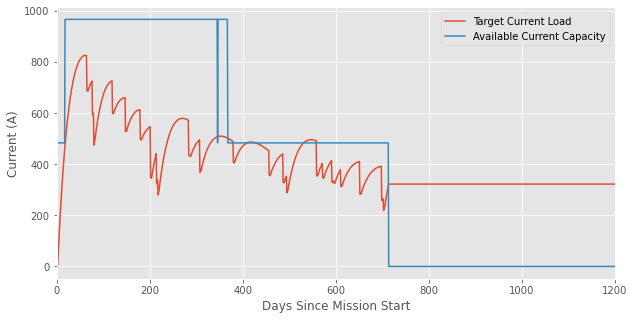

In [44]:
ax_thresholding = plt.gca()
ax_thresholding.ylabel = "Current"
df_thresholding.plot(kind='line', y='Target Current Load', ax=ax_thresholding, xlim = (0, 1200), figsize =(10,5))
df_thresholding.plot(kind='line', y='Available Current Capacity', ax=ax_thresholding, xlim = (0, 1200), figsize =(10,5))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Current (A)')

Text(0, 0.5, 'Generator Runtime (Days)')

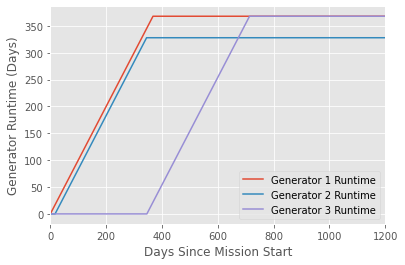

In [45]:
ax2_thresholding = plt.gca()
ax2_thresholding.ylabel = "Runtime"
df_thresholding.plot(kind='line', y='Generator 1 Runtime', ax=ax2_thresholding, xlim = (0,1200))
df_thresholding.plot(kind='line', y='Generator 2 Runtime', ax=ax2_thresholding, xlim = (0,1200))
df_thresholding.plot(kind='line', y='Generator 3 Runtime', ax=ax2_thresholding, xlim = (0,1200))

plt.xlabel('Days Since Mission Start')
plt.ylabel('Generator Runtime (Days)')